**아래 내용은 길벗 출판사의 책, "모두의 딥러닝"의 내용에 설명을 일부를 추가한 것입니다.**

# 6장. 로지스틱 회귀 모델: 참 거짓 판단하기

 법정 드라마나 영화를 보면 검사가 피고인을 다그치는 장면이 종종 나옵니다. 검사의 예리한 질문에 피고인이 당황한 표정으로 변명을 늘어놓을 때 검사가 이렇게 소리칩니다. "예, 아니오로만 대답하세요"

 때로 할 말이 많아도 "예" 혹은 "아니요"로만 대답해야할 때가 있습니다. 그런데 실은 이와 같은 상황이 딥러닝에서도 끊임없이 일어납니다. 전달받은 정보를 놓고 참과 거짓 중 하나를 판단해 다음 단계로 넘기는 장치들이 딥러닝 내부에서 쉬지 않고 작동하는 것이지요. 딥러닝을 수행하다는 것은 겉으로 드러나지 않는 '미니 판단 장치'들을 이용해서 복잡한 연산을 해낸 끝에 최적의 예측값을 내놓은 작업이라고 할 수 있습니다. 

 이렇게 참과 거짓 중 하나를 내놓은 과정은 로지스틱 회귀(logistic regression)를 거쳐 이루어집니다. 이제 회귀 분석의 또 다른 토대를 이루는 로지스틱 회귀에 대해 알아 보겠습니다. 

## 2.로지스틱 회귀의 정의
 5장에서 공부한 시간과 성적 사이의 관계를 그래프로 나타냈을 때, 그래프의 형태가 직선인 선형 회귀를 사용하는 것이 적절함을 보았다. 그런데 직선이 적절하지 않은 경우가 있습니다. 

|공부한시간|2시간|4시간|6시간|8시간|
|---|:---:|:---:|:---:|:--:|
|성적|81|93|91|97| 



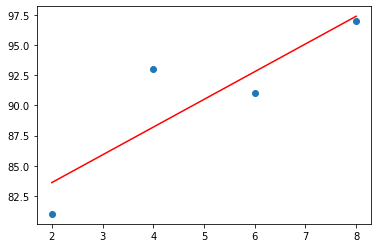

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# 공부 시간 X와 성적 y의 넘파이 배열을 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97]) 
a = 2.3
b = 79
y_pred = a * x + b      

# 그래프 출력
plt.scatter(x, y)
plt.plot(x, y_pred,'r')
plt.show()

점수가 아니라 오직 합격과 불합격만 발표되는 시험이 있다고 합시다. 공부한 시간에 따른 합격 여부를 조사해 보니 아래 표와 같았습니다. 

|공부한 시간|2|4|6|8|10|12|14
|---|:---:|:---:|:---:|:--:|:---:|:---:|:---:|
|합격 여부|불합격|불합격|불합격|합격|합격|합격|합격| 

합격을 1, 불합격을 0이라고 이를 좌표 평면에 표시하면 아래와 같습니다. 선을 그어서 이 점들의 특성을 잘 나타내는 일차 방정식을 만들 수 있을까요? 

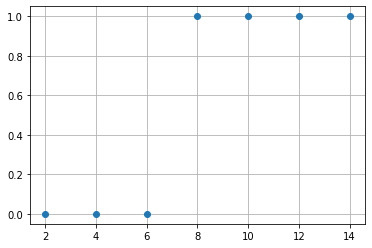

In [3]:
x = np.array([2, 4, 6, 8, 10, 12, 14])
y = np.array([0, 0, 0, 1, 1, 1, 1])
plt.plot(x,y, 'o')
plt.grid()
plt.show()

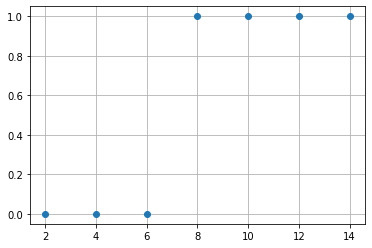

In [4]:
# https://zephyrus1111.tistory.com/103

x = np.array([2, 4, 6, 8, 10, 12, 14])
y = np.array([0, 0, 0, 1, 1, 1, 1])
markers, stemlines, baseline = plt.stem(x, y, use_line_collection=True)
baseline.set_visible(False)
stemlines.set_visible(True)
plt.grid()
plt.show()

점들의 특성을 정확하게 담아내려면 직선이 아니라 다음과 같은 S자 형태가 되어야 합니다.  
(식1)

$$ f(x) = \frac{1}{1+e^{-(ax+b)}} $$

위 식(1)을 **시그모이드** 함수라고 합니다.

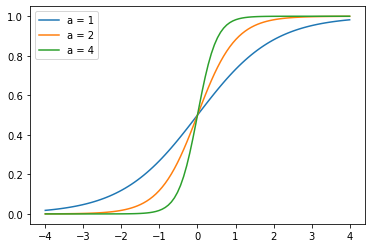

In [ ]:
x = np.linspace(-4, 4, 100)
a = 1
b = 0
f1 = 1 / (1 + np.exp(-(a*x+b)) )
a = 2
f2 = 1 / (1 + np.exp(-(a*x+b)) )
a = 4
f3 = 1 / (1 + np.exp(-(a*x+b)) )
plt.plot(x, f1,label = 'a = 1')
plt.plot(x, f2, label = 'a = 2')
plt.plot(x, f3, label = 'a = 4')
plt.legend()
plt.show()

**위 그래프 해석**  
$a$값이 거질수록 급격하게 곡선이 꺽이는 것을 확일 할 수 있습니다. 즉, $a$값이 커질 수록 실측 데이터에 가까워진다고 볼 수 있겠습니다.

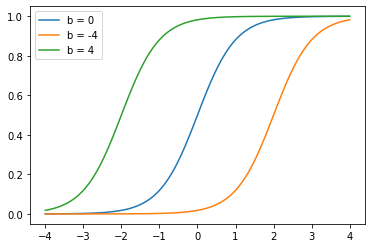

In [ ]:
x = np.linspace(-4, 4, 100)
a = 2
b = 0
f1 = 1 / (1 + np.exp(-(a*x+b)) )
b = -4
f2 = 1 / (1 + np.exp(-(a*x+b)) )
b = 4
f3 = 1 / (1 + np.exp(-(a*x+b)) )
plt.plot(x, f1,label = 'b = 0')
plt.plot(x, f2, label = 'b = -4')
plt.plot(x, f3, label = 'b = 4')
plt.legend()
plt.show()

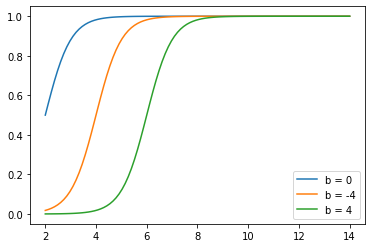

In [ ]:
x = np.linspace(2, 14, 100)
a = 2
b = -4
f1 = 1 / (1 + np.exp(-(a*x+b)) )
b = -8
f2 = 1 / (1 + np.exp(-(a*x+b)) )
b = -12
f3 = 1 / (1 + np.exp(-(a*x+b)) )
plt.plot(x, f1,label = 'b = -4')
plt.plot(x, f2, label = 'b = -8')
plt.plot(x, f3, label = 'b = -12')
plt.legend()
plt.show()

**위 두 그래프 해석**  
그래프는 $b$ 값이 커지면 왼쪽으로 이동하고 $b$값이 작아지면 오른쪽으로 이동한다는 것을 확인했습니다. 

식(1)과 같지 않은 다른 형태의 예측 선을 고려할 수 있지만 우리는 지금 식(1)과 같은 형태의 곡선을 예측 선으로 사용해보려고 합니다. 식(1)의 곡선을 결정하는 요소는 $a$와 $b$입니다. 

따라서 $a$값 변화에 따른 오차 생각해 보면 $a$값이 작아지면 오차는 무한대로 커지지만 $a$ 값이 커진다고 해서 오차가 무한대로 커지지는 않습니다. 별첨한 그래프 참고.

$b$값이 너무 크거나 작은 경우 오차는 별첨한 그래프와 같이 2차 함수 그래프와 유사한 형태로 나타납니다.

## 3.오차 공식

 이제 우리에게 주어진 과제는 또다시 $a$값과 $b$값을 구하는 것임을 알았습니다. 시그모이드 함수에서 $a$값과 $b$값을 어떻게 구해야할까요? 역시 경사 하강법입니다.

 경사 하강법은 먼저 오차를 구한 후 오차가 작은 쪽으로 이동시키는 방법이라고 했습니다. 그렇다면 이번에도 예측 값과 실제 값과의 차이, 즉 오차를 구하는 공식이 필요합니다. 그렇다면 이번에도 앞서 배웠던 평균 제곱 오차(MSE)를 사용하면 될까요? 안타깝게도 이번에는 평균 제곱 오차(MSE)를 사용할 수 없습니다. 오차 공식을 도출하기 위해 시그모이드 함수의 특징을 다시 살펴 보겠습니다.  

 시그모이드 함수의 특징은 $y$ 값이 0과 1사이라는 것입니다. 따라서 실제 값이 1 (합격)일때 예측 값이 0(불합격)에 가까워지면 오차는 커집니다. 반대로 실제 값이 0일 때 예측 값이 1에 까가워지는 경우에도 오차가 커집니다. 이를 공식으로 만들 수 있게 하는 함수가 로그 함수입니다. 


## 4. 로그 함수
 오차 식은 다음의 특성이 있기를 기대합니다. 실제 값이 1일 때 예측 값도 1에 가까워지면서 오차도 0 값에 가까워지는 특성이 있어야겠습니다. 반대로 실제 값이 1인데 예측 값이 0에 가까워지면 오차는 커져야합니다. 또 실제 값이 0일 때 예측 값이 0에 가까워지면서 오차도 0에 가까워지는 특성이 있어야하고 예측 값이 1에 가까워진다면 오차는 커져야 합니다. 
 아래 그래프에서 파란색 선은 예측 값이 1에 가까워지면 오차는 0 값에 가까워지고 예측 값이 0에 가까워지면 오차가 커지는 것을 볼 수 있습니다. 실제 값이 1일 때 오차 식은 파란색 선의 특성을 보여야 합니다. 빨간색 선은 예측 값이 0일 때 오차가 0에 가까고 예측 값이 1일 때 오차는 커집니다. 실제 값이 0일 때 오차 식은 빨간색 선의 특성을 보여야 합니다. 

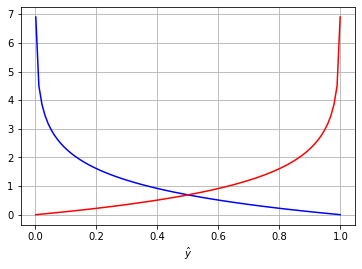

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
t = 0.001
y_hat = np.linspace(t, 1-t, 100)
e1 = - np.log(y_hat)                    #실제 값이 1인 경우 적용할 에러 식
e0 = - np.log(1-y_hat)                  #실제 값이 0인 경우 적용할 에러 식
plt.plot(y_hat, e1, 'b')
plt.plot(y_hat, e0, 'r')
plt.xlabel('$\hat{y}$')
plt.ylabel('e')
plt.grid()
plt.show()

실제 값이 1인 경우 적용할 에러 식은  식 (6-1)과 같다.  
(식. 6-1)
$$e = -\log(\hat{y})$$
실제 값이 0인 경우 에러 식은  식(6-2)와 같다.  
(식. 6-2)
$$e = -\log(1-\hat{y})$$

여기서 $y$를 실제 값이라고 한다면 식 (6-1)과 식 (6-2)를 통합하여 식 (6-3)과 같이 쓸 수 있다.  
(식.6-3)
$$e = -y\log(\hat{y}) -(1-y)\log(1-\hat{y})=-\{y\log(\hat{y}) +(1-y)\log(1-\hat{y}) \}$$

실제 값 $y$가 1이라면 식 (6-3)은 식 (6-1)이 되고 실제 값 $y$이 0이면 식 (6-3)은 식 (6-2)가 된다.

이렇게 해서 평균 제곱 오차를 대체할 만한 손실 함수를 구했습니다. 이 함수를 러닝 머신에서는 **교차 엔트로피 오차(cross entropy error)**함수라고 합니다. 







선형 회귀에서는 평균 제곱 오차를, 로지스틱 회귀에서는 교차 엔트로피 오차 함수를 사용하게 되는 것입니다. 이 두 개의 함수에서 출발해서 지금은 더 다양한 손실 함수들이 존재합니다. 이와 관련해서는 '10장. 딥러닝 모델 설계하기'에서 다시 다룰  것입니다. 

이제 로지시틱 회귀를 사용해서 어떻게 모델을 만들 수 있는지 텐서플로에서 실행해 보겠습니다.

## 5. 텐서플로에서 실행하는 로지스틱 회귀 모델

텐서플로에서 실행하는 방법은 앞서 선형 회귀 모델을 만들 때와 유사합니다. 다른 점은 오차를 계산하기 위한 손실 함수가 평균 제곡 오차 함수에서 크로스 엔트로피 오차 함수로 바뀐다는 것입니다. 

먼저 공부한 시간 대비 합격/불합격 결과를 위한 데이터를 준비하겠습니다.

|공부한 시간|2|4|6|8|10|12|14
|---|:---:|:---:|:---:|:--:|:---:|:---:|:---:|
|합격 여부|불합격|불합격|불합격|합격|합격|합격|합격| 

In [ ]:
# 1. 환경 준비
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 2. 데이터 준비
x = np.array([2, 4, 6, 8, 10, 12, 14])
y = np.array([0, 0, 0, 1, 1, 1, 1]) 

이제 모델을 준비합니다. 먼저 시그모이드 함수를 사용하게 됨으로 model.add()함수에 activation 파라메타에 'sigmod'를 할당합니다.

In [ ]:
model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

손실 함수로 교차 엔트로피 오차 함수를 이용하기 위해 loss 파라미터에 'binary_crossentropy'를 할당합니다.

In [ ]:
# 교차 엔트로피 오차 함수를 이용하기 위하여 'binary_crossentropy'로 설정합니다. 
model.compile(optimizer='sgd' ,loss='binary_crossentropy')

생성된 모델을 적용합니다.

In [ ]:
model.fit(x, y, epochs=5000)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 6ms/step - loss: 0.2625
Epoch 2502/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2624
Epoch 2503/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2624
Epoch 2504/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2623
Epoch 2505/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2623
Epoch 2506/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2622
Epoch 2507/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2622
Epoch 2508/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2621
Epoch 2509/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2621
Epoch 2510/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2620
Epoch 2511/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2620
Epoch 2512/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2

model.fit()이 종료된 후 model.predict() 함수를 이용해서 학습 시간 $x$가 입력되었을 때 결과를 그래프로 그려 봅니다. model.fit() 함수가 완료되기까지 약 5분의 시간이 걸립니다. (2022년 10월, 4분 25초 거렸음, 하드웨어 가속기 GPU 사용 했을 때 3분대...ㅠ.ㅠ )

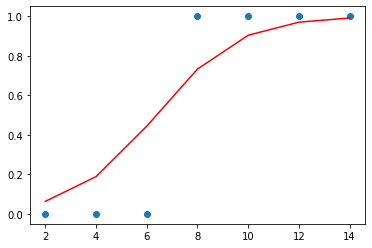

In [ ]:
plt.scatter(x, y)
plt.plot(x, model.predict(x), 'r')
plt.show()

임의의 학습 시간에 따른 합격 확율을 보여주눈 코드는 다음과 같습니다.

In [ ]:
hour = 7
prediction = model.predict([hour])
print('%.f시간을 공부할 경우, 합격 예상 확율은 %.1f입니다' % (hour, prediction * 100))

7시간을 공부할 경우, 합격 예상 확율은 59.7입니다


### 1.환경 준비

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### 2. 데이터 준비

In [ ]:
x = np.array([2, 4, 6, 8, 10, 12, 14])
y = np.array([0, 0, 0, 1, 1, 1, 1]) 

### 3. 모델 실행

In [ ]:
model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

# 교차 엔트로피 오차 함수를 이용하기 위하여 'binary_crossentropy'로 설정합니다. 
model.compile(optimizer='sgd' ,loss='binary_crossentropy')
model.fit(x, y, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 0s 183ms/step - loss: 0.5741
Epoch 2/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5677
Epoch 3/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5632
Epoch 4/5000
1/1 [==============================] - 0s 998us/step - loss: 0.5599
Epoch 5/5000
1/1 [==============================] - 0s 998us/step - loss: 0.5574
Epoch 6/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.5555
Epoch 7/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5541
Epoch 8/5000
1/1 [==============================] - 0s 999us/step - loss: 0.5530
Epoch 9/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5521
Epoch 10/5000
1/1 [==============================] - 0s 998us/step - loss: 0.5513
Epoch 11/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5507
Epoch 12/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5502
Epoch 13/5000
1/1 [=================

1/1 [==============================] - 0s 1ms/step - loss: 0.5032
Epoch 203/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5029
Epoch 204/5000
1/1 [==============================] - 0s 997us/step - loss: 0.5027
Epoch 205/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5025
Epoch 206/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5023
Epoch 207/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5020
Epoch 208/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.5018
Epoch 209/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5016
Epoch 210/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5014
Epoch 211/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.5012
Epoch 212/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.5009
Epoch 213/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5007
Epoch 214/5000
1/1 [============

1/1 [==============================] - 0s 994us/step - loss: 0.4620
Epoch 403/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4618
Epoch 404/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.4616
Epoch 405/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4614
Epoch 406/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.4612
Epoch 407/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4610
Epoch 408/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4608
Epoch 409/5000
1/1 [==============================] - 0s 997us/step - loss: 0.4606
Epoch 410/5000
1/1 [==============================] - 0s 998us/step - loss: 0.4605
Epoch 411/5000
1/1 [==============================] - 0s 999us/step - loss: 0.4603
Epoch 412/5000
1/1 [==============================] - 0s 999us/step - loss: 0.4601
Epoch 413/5000
1/1 [==============================] - 0s 999us/step - loss: 0.4599
Epoch 414/5000
1/1 [========

1/1 [==============================] - 0s 1000us/step - loss: 0.4438
Epoch 503/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4436
Epoch 504/5000
1/1 [==============================] - 0s 998us/step - loss: 0.4435
Epoch 505/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4433
Epoch 506/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.4431
Epoch 507/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.4429
Epoch 508/5000
1/1 [==============================] - 0s 999us/step - loss: 0.4428
Epoch 509/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4426
Epoch 510/5000
1/1 [==============================] - 0s 999us/step - loss: 0.4424
Epoch 511/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4422
Epoch 512/5000
1/1 [==============================] - 0s 998us/step - loss: 0.4421
Epoch 513/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4419
Epoch 514/5000
1/1 [======

1/1 [==============================] - 0s 1000us/step - loss: 0.4117
Epoch 703/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4115
Epoch 704/5000
1/1 [==============================] - 0s 997us/step - loss: 0.4114
Epoch 705/5000
1/1 [==============================] - 0s 997us/step - loss: 0.4112
Epoch 706/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4111
Epoch 707/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.4109
Epoch 708/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4108
Epoch 709/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.4106
Epoch 710/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4105
Epoch 711/5000
1/1 [==============================] - 0s 998us/step - loss: 0.4103
Epoch 712/5000
1/1 [==============================] - 0s 998us/step - loss: 0.4102
Epoch 713/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.4100
Epoch 714/5000
1/1 [======

1/1 [==============================] - 0s 1ms/step - loss: 0.3843
Epoch 903/5000
1/1 [==============================] - 0s 999us/step - loss: 0.3841
Epoch 904/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3840
Epoch 905/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3839
Epoch 906/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3838
Epoch 907/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.3836
Epoch 908/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3835
Epoch 909/5000
1/1 [==============================] - 0s 999us/step - loss: 0.3834
Epoch 910/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3833
Epoch 911/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3831
Epoch 912/5000
1/1 [==============================] - 0s 997us/step - loss: 0.3830
Epoch 913/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3829
Epoch 914/5000
1/1 [==============

1/1 [==============================] - 0s 998us/step - loss: 0.3608
Epoch 1102/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3607
Epoch 1103/5000
1/1 [==============================] - 0s 999us/step - loss: 0.3606
Epoch 1104/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3605
Epoch 1105/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3604
Epoch 1106/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3603
Epoch 1107/5000
1/1 [==============================] - 0s 997us/step - loss: 0.3602
Epoch 1108/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3601
Epoch 1109/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3600
Epoch 1110/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3599
Epoch 1111/5000
1/1 [==============================] - 0s 999us/step - loss: 0.3597
Epoch 1112/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3596
Epoch 1113/5000
1/1 [===

1/1 [==============================] - 0s 996us/step - loss: 0.3504
Epoch 1201/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.3503
Epoch 1202/5000
1/1 [==============================] - 0s 998us/step - loss: 0.3502
Epoch 1203/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3501
Epoch 1204/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.3500
Epoch 1205/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3499
Epoch 1206/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3498
Epoch 1207/5000
1/1 [==============================] - 0s 997us/step - loss: 0.3497
Epoch 1208/5000
1/1 [==============================] - 0s 998us/step - loss: 0.3496
Epoch 1209/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3495
Epoch 1210/5000
1/1 [==============================] - 0s 999us/step - loss: 0.3494
Epoch 1211/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3493
Epoch 1212/5000


1/1 [==============================] - 0s 996us/step - loss: 0.3407
Epoch 1300/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3406
Epoch 1301/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3405
Epoch 1302/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.3404
Epoch 1303/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3403
Epoch 1304/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3402
Epoch 1305/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3401
Epoch 1306/5000
1/1 [==============================] - 0s 996us/step - loss: 0.3400
Epoch 1307/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3399
Epoch 1308/5000
1/1 [==============================] - 0s 999us/step - loss: 0.3398
Epoch 1309/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3397
Epoch 1310/5000
1/1 [==============================] - 0s 998us/step - loss: 0.3396
Epoch 1311/5000
1/1 [

1/1 [==============================] - 0s 996us/step - loss: 0.3231
Epoch 1498/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3230
Epoch 1499/5000
1/1 [==============================] - 0s 996us/step - loss: 0.3229
Epoch 1500/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3228
Epoch 1501/5000
1/1 [==============================] - 0s 999us/step - loss: 0.3227
Epoch 1502/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3227
Epoch 1503/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3226
Epoch 1504/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3225
Epoch 1505/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3224
Epoch 1506/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3223
Epoch 1507/5000
1/1 [==============================] - 0s 998us/step - loss: 0.3222
Epoch 1508/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3222
Epoch 1509/5000
1/1 [===

1/1 [==============================] - 0s 1000us/step - loss: 0.3151
Epoch 1597/5000
1/1 [==============================] - 0s 997us/step - loss: 0.3150
Epoch 1598/5000
1/1 [==============================] - 0s 996us/step - loss: 0.3149
Epoch 1599/5000
1/1 [==============================] - 0s 999us/step - loss: 0.3149
Epoch 1600/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3148
Epoch 1601/5000
1/1 [==============================] - 0s 997us/step - loss: 0.3147
Epoch 1602/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3146
Epoch 1603/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3146
Epoch 1604/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3145
Epoch 1605/5000
1/1 [==============================] - 0s 998us/step - loss: 0.3144
Epoch 1606/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3143
Epoch 1607/5000
1/1 [==============================] - 0s 999us/step - loss: 0.3142
Epoch 1608/5000
1

1/1 [==============================] - 0s 1ms/step - loss: 0.3076
Epoch 1696/5000
1/1 [==============================] - 0s 997us/step - loss: 0.3075
Epoch 1697/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3075
Epoch 1698/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.3074
Epoch 1699/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3073
Epoch 1700/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3073
Epoch 1701/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3072
Epoch 1702/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.3071
Epoch 1703/5000
1/1 [==============================] - 0s 997us/step - loss: 0.3070
Epoch 1704/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3070
Epoch 1705/5000
1/1 [==============================] - 0s 997us/step - loss: 0.3069
Epoch 1706/5000
1/1 [==============================] - 0s 998us/step - loss: 0.3068
Epoch 1707/5000
1/1 [

Epoch 1892/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2940
Epoch 1893/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2940
Epoch 1894/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2939
Epoch 1895/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2938
Epoch 1896/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2938
Epoch 1897/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2937
Epoch 1898/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2936
Epoch 1899/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2936
Epoch 1900/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2935
Epoch 1901/5000
1/1 [==============================] - 0s 994us/step - loss: 0.2934
Epoch 1902/5000
1/1 [==============================] - 0s 999us/step - loss: 0.2934
Epoch 1903/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.2933
Epo

Epoch 2089/5000
1/1 [==============================] - 0s 997us/step - loss: 0.2819
Epoch 2090/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.2818
Epoch 2091/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2818
Epoch 2092/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2817
Epoch 2093/5000
1/1 [==============================] - 0s 996us/step - loss: 0.2817
Epoch 2094/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2816
Epoch 2095/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2816
Epoch 2096/5000
1/1 [==============================] - 0s 999us/step - loss: 0.2815
Epoch 2097/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2814
Epoch 2098/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2814
Epoch 2099/5000
1/1 [==============================] - 0s 997us/step - loss: 0.2813
Epoch 2100/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2813
E

Epoch 2286/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2711
Epoch 2287/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2710
Epoch 2288/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2710
Epoch 2289/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2709
Epoch 2290/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.2708
Epoch 2291/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2708
Epoch 2292/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2707
Epoch 2293/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2707
Epoch 2294/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.2706
Epoch 2295/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2706
Epoch 2296/5000
1/1 [==============================] - 0s 999us/step - loss: 0.2705
Epoch 2297/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2705
Epoch 22

1/1 [==============================] - 0s 1ms/step - loss: 0.2660
Epoch 2386/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2660
Epoch 2387/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2659
Epoch 2388/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2659
Epoch 2389/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2658
Epoch 2390/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2658
Epoch 2391/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2657
Epoch 2392/5000
1/1 [==============================] - 0s 999us/step - loss: 0.2657
Epoch 2393/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2656
Epoch 2394/5000
1/1 [==============================] - 0s 999us/step - loss: 0.2656
Epoch 2395/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2655
Epoch 2396/5000
1/1 [==============================] - 0s 999us/step - loss: 0.2655
Epoch 2397/5000
1/1 [=

1/1 [==============================] - 0s 2ms/step - loss: 0.2567
Epoch 2584/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2566
Epoch 2585/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2566
Epoch 2586/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2565
Epoch 2587/5000
1/1 [==============================] - 0s 999us/step - loss: 0.2565
Epoch 2588/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2565
Epoch 2589/5000
1/1 [==============================] - 0s 996us/step - loss: 0.2564
Epoch 2590/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2564
Epoch 2591/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2563
Epoch 2592/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2563
Epoch 2593/5000
1/1 [==============================] - 0s 999us/step - loss: 0.2562
Epoch 2594/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2562
Epoch 2595/5000
1/1 [=====

1/1 [==============================] - 0s 1ms/step - loss: 0.2523
Epoch 2683/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2523
Epoch 2684/5000
1/1 [==============================] - 0s 997us/step - loss: 0.2523
Epoch 2685/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2522
Epoch 2686/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2522
Epoch 2687/5000
1/1 [==============================] - 0s 995us/step - loss: 0.2521
Epoch 2688/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2521
Epoch 2689/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2520
Epoch 2690/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2520
Epoch 2691/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2520
Epoch 2692/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2519
Epoch 2693/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2519
Epoch 2694/5000
1/1 

1/1 [==============================] - 0s 994us/step - loss: 0.2482
Epoch 2782/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2482
Epoch 2783/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2481
Epoch 2784/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.2481
Epoch 2785/5000
1/1 [==============================] - 0s 999us/step - loss: 0.2480
Epoch 2786/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2480
Epoch 2787/5000
1/1 [==============================] - 0s 997us/step - loss: 0.2480
Epoch 2788/5000
1/1 [==============================] - 0s 991us/step - loss: 0.2479
Epoch 2789/5000
1/1 [==============================] - 0s 999us/step - loss: 0.2479
Epoch 2790/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2478
Epoch 2791/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.2478
Epoch 2792/5000
1/1 [==============================] - 0s 993us/step - loss: 0.2478
Epoch 2793/5

1/1 [==============================] - 0s 999us/step - loss: 0.2443
Epoch 2881/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.2442
Epoch 2882/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2442
Epoch 2883/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2441
Epoch 2884/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2441
Epoch 2885/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2441
Epoch 2886/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2440
Epoch 2887/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2440
Epoch 2888/5000
1/1 [==============================] - 0s 999us/step - loss: 0.2439
Epoch 2889/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2439
Epoch 2890/5000
1/1 [==============================] - 0s 999us/step - loss: 0.2439
Epoch 2891/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2438
Epoch 2892/5000

1/1 [==============================] - 0s 2ms/step - loss: 0.2405
Epoch 2980/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2404
Epoch 2981/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2404
Epoch 2982/5000
1/1 [==============================] - 0s 988us/step - loss: 0.2404
Epoch 2983/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2403
Epoch 2984/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2403
Epoch 2985/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2403
Epoch 2986/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2402
Epoch 2987/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.2402
Epoch 2988/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2401
Epoch 2989/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2401
Epoch 2990/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2401
Epoch 2991/5000
1/1

1/1 [==============================] - 0s 2ms/step - loss: 0.2369
Epoch 3079/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2368
Epoch 3080/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2368
Epoch 3081/5000
1/1 [==============================] - 0s 977us/step - loss: 0.2368
Epoch 3082/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2367
Epoch 3083/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2367
Epoch 3084/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2366
Epoch 3085/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2366
Epoch 3086/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.2366
Epoch 3087/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2365
Epoch 3088/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2365
Epoch 3089/5000
1/1 [==============================] - 0s 999us/step - loss: 0.2365
Epoch 3090/5000
1/1 [

1/1 [==============================] - 0s 2ms/step - loss: 0.2334
Epoch 3178/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2334
Epoch 3179/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2333
Epoch 3180/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2333
Epoch 3181/5000
1/1 [==============================] - 0s 999us/step - loss: 0.2333
Epoch 3182/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2332
Epoch 3183/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2332
Epoch 3184/5000
1/1 [==============================] - 0s 999us/step - loss: 0.2332
Epoch 3185/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2331
Epoch 3186/5000
1/1 [==============================] - 0s 997us/step - loss: 0.2331
Epoch 3187/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2331
Epoch 3188/5000
1/1 [==============================] - 0s 999us/step - loss: 0.2330
Epoch 3189/5000
1/1 

1/1 [==============================] - 0s 998us/step - loss: 0.2301
Epoch 3277/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2300
Epoch 3278/5000
1/1 [==============================] - 0s 997us/step - loss: 0.2300
Epoch 3279/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2300
Epoch 3280/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2299
Epoch 3281/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2299
Epoch 3282/5000
1/1 [==============================] - 0s 997us/step - loss: 0.2299
Epoch 3283/5000
1/1 [==============================] - 0s 999us/step - loss: 0.2298
Epoch 3284/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2298
Epoch 3285/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2298
Epoch 3286/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2298
Epoch 3287/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2297
Epoch 3288/5000
1/1 [=

1/1 [==============================] - 0s 999us/step - loss: 0.2269
Epoch 3376/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2269
Epoch 3377/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2268
Epoch 3378/5000
1/1 [==============================] - 0s 999us/step - loss: 0.2268
Epoch 3379/5000
1/1 [==============================] - 0s 997us/step - loss: 0.2268
Epoch 3380/5000
1/1 [==============================] - 0s 997us/step - loss: 0.2267
Epoch 3381/5000
1/1 [==============================] - 0s 999us/step - loss: 0.2267
Epoch 3382/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2267
Epoch 3383/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2266
Epoch 3384/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2266
Epoch 3385/5000
1/1 [==============================] - 0s 999us/step - loss: 0.2266
Epoch 3386/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2265
Epoch 3387/5000
1/

1/1 [==============================] - 0s 2ms/step - loss: 0.2238
Epoch 3475/5000
1/1 [==============================] - 0s 999us/step - loss: 0.2238
Epoch 3476/5000
1/1 [==============================] - 0s 999us/step - loss: 0.2238
Epoch 3477/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2237
Epoch 3478/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2237
Epoch 3479/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2237
Epoch 3480/5000
1/1 [==============================] - 0s 999us/step - loss: 0.2236
Epoch 3481/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2236
Epoch 3482/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2236
Epoch 3483/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2236
Epoch 3484/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2235
Epoch 3485/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2235
Epoch 3486/5000
1/1 [===

1/1 [==============================] - 0s 999us/step - loss: 0.2181
Epoch 3672/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2181
Epoch 3673/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2180
Epoch 3674/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2180
Epoch 3675/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.2180
Epoch 3676/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2179
Epoch 3677/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2179
Epoch 3678/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.2179
Epoch 3679/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2179
Epoch 3680/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2178
Epoch 3681/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2178
Epoch 3682/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2178
Epoch 3683/5000
1/

1/1 [==============================] - 0s 2ms/step - loss: 0.2153
Epoch 3771/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2153
Epoch 3772/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2153
Epoch 3773/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2153
Epoch 3774/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2152
Epoch 3775/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.2152
Epoch 3776/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.2152
Epoch 3777/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2152
Epoch 3778/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2151
Epoch 3779/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2151
Epoch 3780/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2151
Epoch 3781/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2151
Epoch 3782/5000
1/1 [=====

1/1 [==============================] - 0s 999us/step - loss: 0.2127
Epoch 3870/5000
1/1 [==============================] - 0s 999us/step - loss: 0.2127
Epoch 3871/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.2127
Epoch 3872/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2126
Epoch 3873/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2126
Epoch 3874/5000
1/1 [==============================] - 0s 996us/step - loss: 0.2126
Epoch 3875/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2126
Epoch 3876/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2125
Epoch 3877/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2125
Epoch 3878/5000
1/1 [==============================] - 0s 996us/step - loss: 0.2125
Epoch 3879/5000
1/1 [==============================] - 0s 999us/step - loss: 0.2125
Epoch 3880/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.2124
Epoch 3881/5000


1/1 [==============================] - 0s 999us/step - loss: 0.2078
Epoch 4067/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2077
Epoch 4068/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2077
Epoch 4069/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2077
Epoch 4070/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2077
Epoch 4071/5000
1/1 [==============================] - 0s 997us/step - loss: 0.2076
Epoch 4072/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2076
Epoch 4073/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2076
Epoch 4074/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2076
Epoch 4075/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2075
Epoch 4076/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2075
Epoch 4077/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2075
Epoch 4078/5000
1/1 [=======

1/1 [==============================] - 0s 2ms/step - loss: 0.2031
Epoch 4265/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2031
Epoch 4266/5000
1/1 [==============================] - 0s 999us/step - loss: 0.2030
Epoch 4267/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2030
Epoch 4268/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.2030
Epoch 4269/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2030
Epoch 4270/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.2030
Epoch 4271/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2029
Epoch 4272/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2029
Epoch 4273/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2029
Epoch 4274/5000
1/1 [==============================] - 0s 997us/step - loss: 0.2029
Epoch 4275/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2028
Epoch 4276/5000
1/1 [

1/1 [==============================] - 0s 999us/step - loss: 0.2009
Epoch 4364/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2009
Epoch 4365/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2008
Epoch 4366/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2008
Epoch 4367/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2008
Epoch 4368/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2008
Epoch 4369/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2007
Epoch 4370/5000
1/1 [==============================] - 0s 998us/step - loss: 0.2007
Epoch 4371/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.2007
Epoch 4372/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2007
Epoch 4373/5000
1/1 [==============================] - 0s 992us/step - loss: 0.2007
Epoch 4374/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2006
Epoch 4375/5000
1

1/1 [==============================] - 0s 998us/step - loss: 0.1967
Epoch 4561/5000
1/1 [==============================] - 0s 998us/step - loss: 0.1967
Epoch 4562/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.1966
Epoch 4563/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1966
Epoch 4564/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.1966
Epoch 4565/5000
1/1 [==============================] - 0s 999us/step - loss: 0.1966
Epoch 4566/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1965
Epoch 4567/5000
1/1 [==============================] - 0s 998us/step - loss: 0.1965
Epoch 4568/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1965
Epoch 4569/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.1965
Epoch 4570/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1965
Epoch 4571/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1964
Epoch 4572/5000
1/1 [

1/1 [==============================] - 0s 1000us/step - loss: 0.1947
Epoch 4660/5000
1/1 [==============================] - 0s 998us/step - loss: 0.1946
Epoch 4661/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.1946
Epoch 4662/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1946
Epoch 4663/5000
1/1 [==============================] - 0s 999us/step - loss: 0.1946
Epoch 4664/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1946
Epoch 4665/5000
1/1 [==============================] - 0s 998us/step - loss: 0.1945
Epoch 4666/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1945
Epoch 4667/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.1945
Epoch 4668/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1945
Epoch 4669/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.1945
Epoch 4670/5000
1/1 [==============================] - 0s 998us/step - loss: 0.1944
Epoch 4671/5000
1/1 [

1/1 [==============================] - 0s 2ms/step - loss: 0.1927
Epoch 4759/5000
1/1 [==============================] - 0s 999us/step - loss: 0.1927
Epoch 4760/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1927
Epoch 4761/5000
1/1 [==============================] - 0s 998us/step - loss: 0.1926
Epoch 4762/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1926
Epoch 4763/5000
1/1 [==============================] - 0s 999us/step - loss: 0.1926
Epoch 4764/5000
1/1 [==============================] - 0s 997us/step - loss: 0.1926
Epoch 4765/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1926
Epoch 4766/5000
1/1 [==============================] - 0s 999us/step - loss: 0.1925
Epoch 4767/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.1925
Epoch 4768/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1925
Epoch 4769/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1925
Epoch 4770/5000
1/1 [=

1/1 [==============================] - 0s 2ms/step - loss: 0.1908
Epoch 4858/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1908
Epoch 4859/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.1908
Epoch 4860/5000
1/1 [==============================] - 0s 998us/step - loss: 0.1908
Epoch 4861/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1907
Epoch 4862/5000
1/1 [==============================] - 0s 999us/step - loss: 0.1907
Epoch 4863/5000
1/1 [==============================] - 0s 998us/step - loss: 0.1907
Epoch 4864/5000
1/1 [==============================] - 0s 998us/step - loss: 0.1907
Epoch 4865/5000
1/1 [==============================] - 0s 992us/step - loss: 0.1907
Epoch 4866/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.1906
Epoch 4867/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.1906
Epoch 4868/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.1906
Epoch 4869/5000
1/1 [=

1/1 [==============================] - 0s 2ms/step - loss: 0.1890
Epoch 4957/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1889
Epoch 4958/5000
1/1 [==============================] - 0s 998us/step - loss: 0.1889
Epoch 4959/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.1889
Epoch 4960/5000
1/1 [==============================] - 0s 999us/step - loss: 0.1889
Epoch 4961/5000
1/1 [==============================] - 0s 998us/step - loss: 0.1889
Epoch 4962/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1889
Epoch 4963/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1888
Epoch 4964/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1888
Epoch 4965/5000
1/1 [==============================] - 0s 997us/step - loss: 0.1888
Epoch 4966/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1888
Epoch 4967/5000
1/1 [==============================] - 0s 998us/step - loss: 0.1888
Epoch 4968/5000
1/1 [=

### 4. 모델 테스트

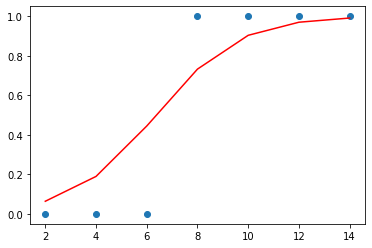

In [ ]:
# 그래프로 확인해 봅니다.

plt.scatter(x, y)
plt.plot(x, model.predict(x),'r')
plt.show()

In [ ]:
# 임의의 학습 시간을 집어넣어 합격 예상 확률을 예측해 보겠습니다.

hour = 7
prediction = model.predict([hour])

print("%.f시간을 공부할 경우, 합격 예상 확률은 %.01f%%입니다" % (hour, prediction * 100))

7시간을 공부할 경우, 합격 예상 확률은 59.7%입니다


출력되는 그래프는 학습이 진행됨에 따라 점점 시그모이드 함수 그래프의 형태를 취해 가는 것을 보여 줍니다. 학습된 모델의 테스트를 위해 여러 가지 임의의 시간을 집어넣고 테스해 보면, 학습 시간이 7보다 클 경에는 합격 확율이 50%가 넘는다는 것을 알 수 있습니다. 데이터 양이나 학습 시간 등 환경에 따라 예측 정확도는 더욱 향상 될 수 있습니다.

지금까지 선형 회귀와 로지스틱 회귀를 사용한 모델링에 관해 알아봤습니다. 이 두 가지가 딥러닝의 기본 요소가 되는 것을 이미 설명한 바 있습니다. 그러면 이러한 통계 모델링은 어떻게 해서 딥러닝과 연관을 갖게 될까요? 로지스틱 회귀 모델의 전신인 퍼셉트론과 퍼셉트로의  한계를 극복하며 탄생한 신경망에 대해 상세히 알아보며 딥러닝 학습 속도를 더해보겠습니다.